In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import statsmodels.api as sm


In [2]:
df = wrangle.get_csv_germany()

In [3]:
df = wrangle.germany_prep(df)

In [4]:
df

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,164.814173,89.258695,0.000,January,2006
2006-01-02,1380.52100,164.814173,89.258695,0.000,January,2006
2006-01-03,1442.53300,164.814173,89.258695,0.000,January,2006
2006-01-04,1457.21700,164.814173,89.258695,0.000,January,2006
2006-01-05,1477.13100,164.814173,89.258695,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507000,16.530000,411.037,December,2017
2017-12-28,1299.86398,506.424000,14.162000,520.586,December,2017
2017-12-29,1295.08753,584.277000,29.854000,614.131,December,2017


In [5]:
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n)

In [6]:
train = df.iloc[:test_start_index] 
test = df.iloc[test_start_index:] 

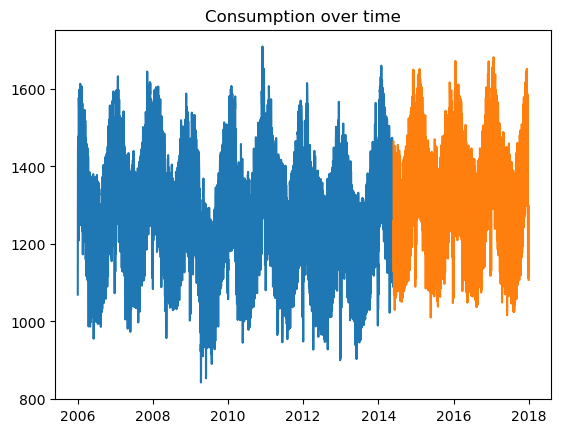

In [7]:
plt.plot(train.Consumption)
plt.plot(test.Consumption)
plt.title('Consumption over time')
plt.show()

In [8]:
train = df.loc[:'2015'].copy()
test = df.loc['2016':].copy()

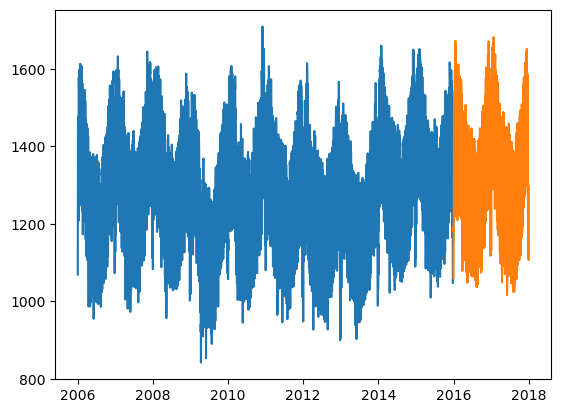

In [9]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)
plt.show()

In [10]:
y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

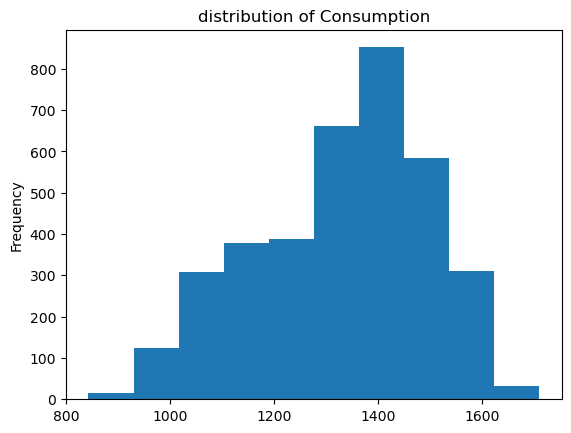

In [11]:
train.Consumption.plot.hist()
plt.title('distribution of Consumption')
plt.show()

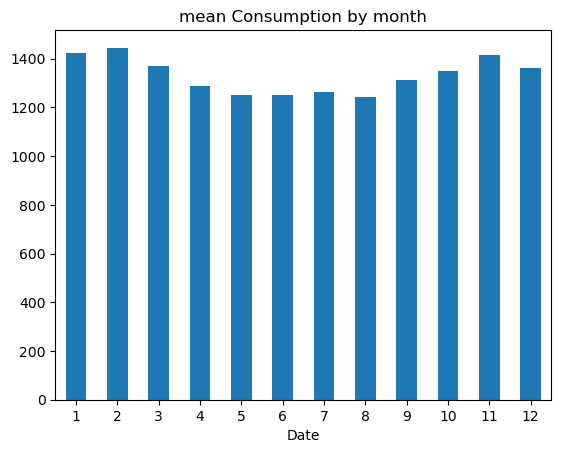

In [12]:
train.groupby(train.index.month).Consumption.mean().plot.bar().tick_params('x', rotation=0)

plt.title('mean Consumption by month')
plt.show()

In [13]:
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/2162039854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('weekday').mean().sort_values('day_num').Consumption.plot.bar()


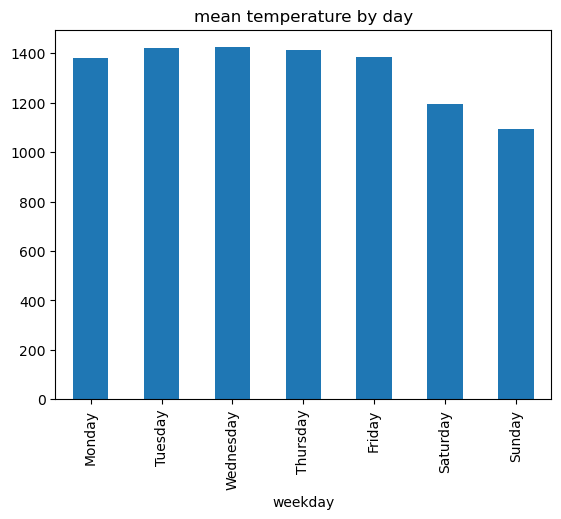

In [14]:
train.groupby('weekday').mean().sort_values('day_num').Consumption.plot.bar()

plt.title('mean temperature by day')
plt.show()

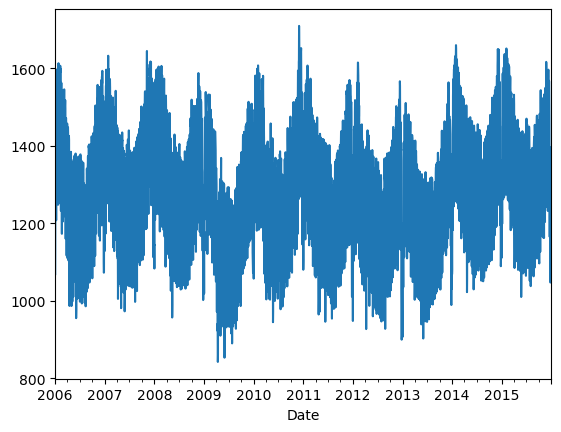

In [15]:
y.plot();

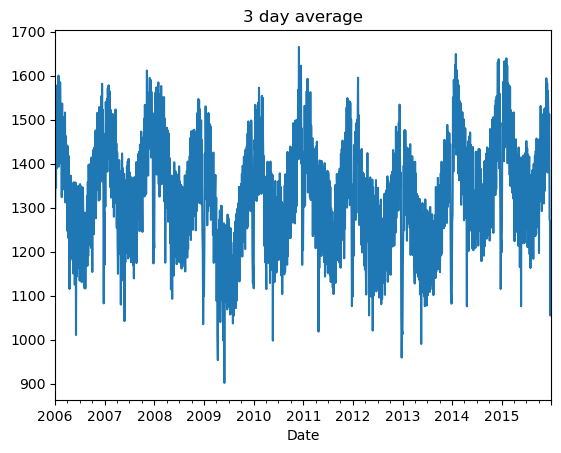

In [16]:
y.resample('3D').mean().plot(title='3 day average');

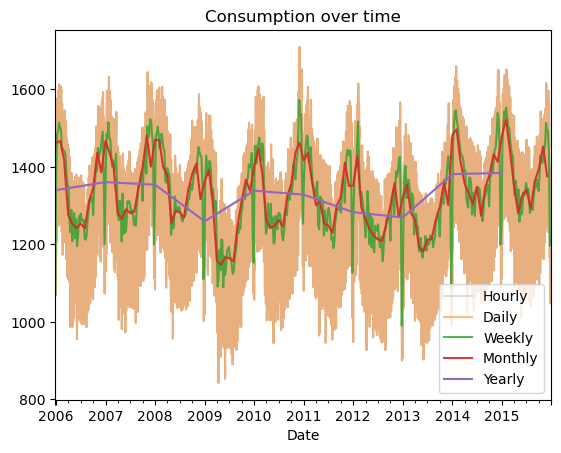

In [17]:
y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('Consumption over time')
plt.legend()
plt.show()

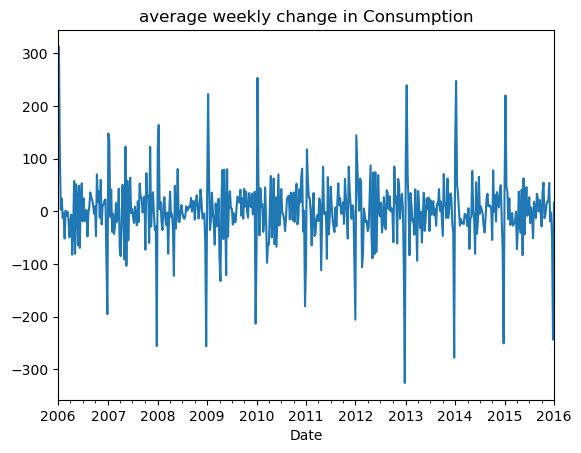

In [18]:
y.resample('W').mean().diff().plot(title='average weekly change in Consumption');

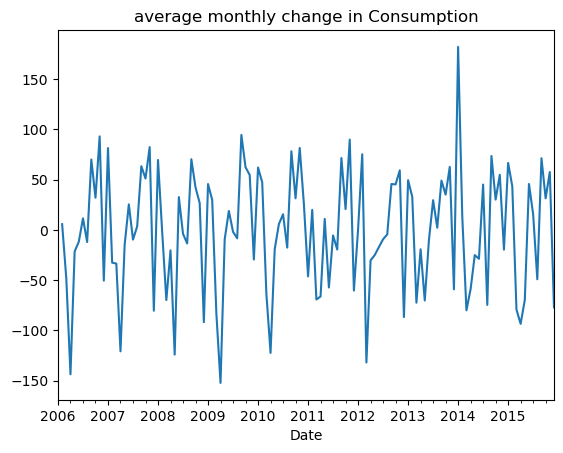

In [19]:
y.resample('M').mean().diff().plot(title='average monthly change in Consumption');

In [20]:
y.groupby([y.index.year, y.index.month]).mean()[:6]

Date  Date
2006  1       1461.442065
      2       1467.106893
      3       1418.649161
      4       1275.058900
      5       1253.488484
      6       1241.781667
Name: Consumption, dtype: float64

In [21]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1332.490710,1303.712233,1348.810258,1274.170968,1347.642400,1377.754355,1432.526667,1412.856161


In [22]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

Date,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Date,,,,,,,,,,
1,1461.442065,1467.058032,1470.373484,1362.255613,1400.041677,1416.290581,1351.441226,1321.194935,1483.261323,1479.451968
2,1467.106893,1434.484357,1468.486207,1392.155179,1447.322536,1436.212607,1426.666241,1354.087429,1496.465536,1522.838964
3,1418.649161,1400.909871,1398.653258,1309.222387,1383.865226,1366.989516,1294.748258,1281.671581,1416.458355,1443.586774
4,1275.058900,1280.133167,1378.243233,1157.006367,1261.505467,1300.732300,1264.427000,1262.359967,1357.582700,1350.108400
5,1253.488484,1265.436000,1254.194226,1147.650742,1242.220129,1311.608290,1239.388710,1192.123032,1332.490710,1280.312677
6,1241.781667,1290.828733,1286.797100,1166.456833,1247.938433,1254.294333,1222.315667,1181.999000,1303.712233,1325.948067
7,1253.296290,1281.134258,1282.866355,1164.515871,1263.467452,1248.768194,1212.953710,1211.503484,1348.810258,1341.598968
8,1241.188774,1284.554355,1269.323484,1156.114645,1245.832323,1229.204935,1208.466258,1213.691355,1274.170968,1292.465581
9,1311.169933,1347.857500,1339.615433,1250.585967,1324.003533,1300.706833,1254.097633,1262.723900,1347.642400,1363.728767


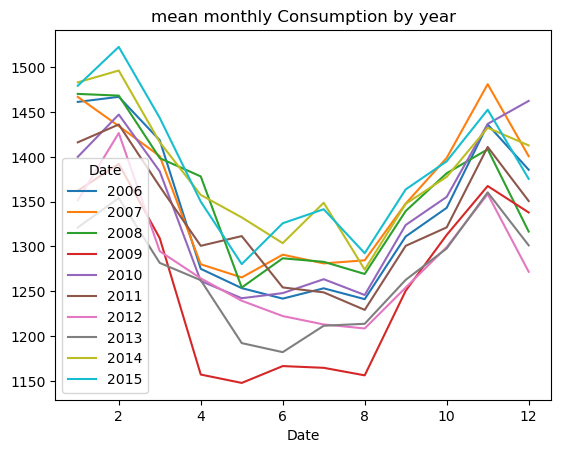

In [23]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly Consumption by year')
plt.show()

In [24]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1332.490710,1303.712233,1348.810258,1274.170968,1347.642400,1377.754355,1432.526667,1412.856161


/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/638820990.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


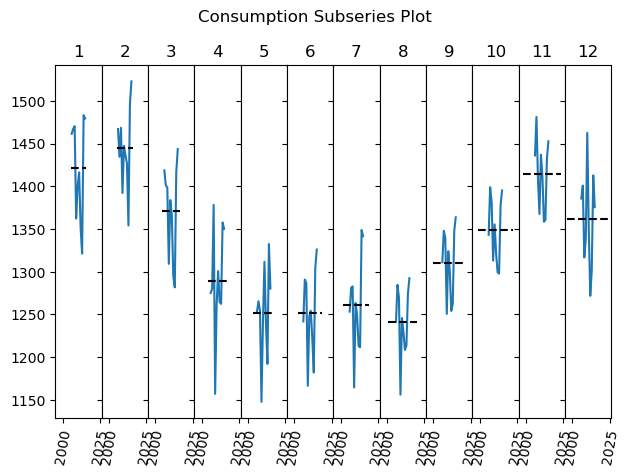

In [25]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=80)
    
fig.suptitle('Consumption Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [26]:
train['y(t + 1)'] = train.Consumption.shift(-1)
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,weekday,day_num,y(t + 1)
Date,,,,,,,,,
2006-01-01,1069.184,164.814173,89.258695,0.0,January,2006,Sunday,6,1380.521
2006-01-02,1380.521,164.814173,89.258695,0.0,January,2006,Monday,0,1442.533
2006-01-03,1442.533,164.814173,89.258695,0.0,January,2006,Tuesday,1,1457.217
2006-01-04,1457.217,164.814173,89.258695,0.0,January,2006,Wednesday,2,1477.131
2006-01-05,1477.131,164.814173,89.258695,0.0,January,2006,Thursday,3,1403.427


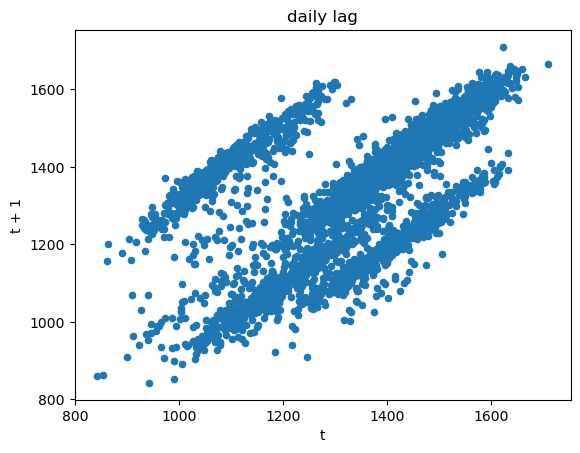

In [27]:
train.plot.scatter(x='Consumption', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('daily lag')
plt.show()

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/847318764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean().drop(columns='y(t + 1)')


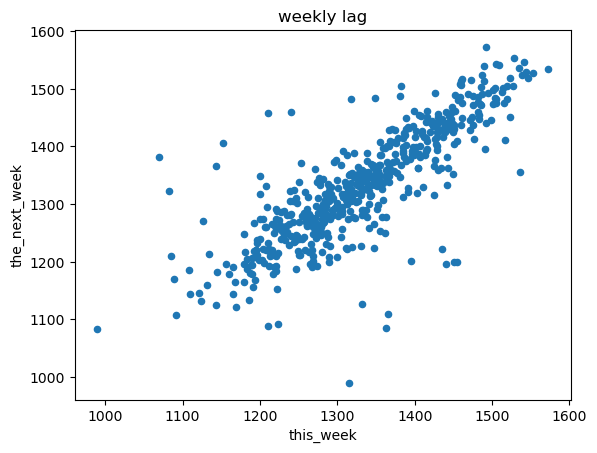

In [28]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/754835460.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly  = train.resample('W').mean().drop(columns='y(t + 1)')


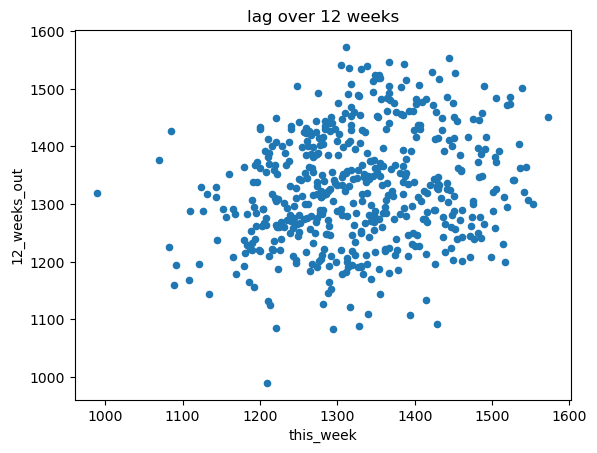

In [29]:
weekly  = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['12_weeks_out'] = weekly.Consumption.shift(-12)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
plt.title('lag over 12 weeks')
plt.show()

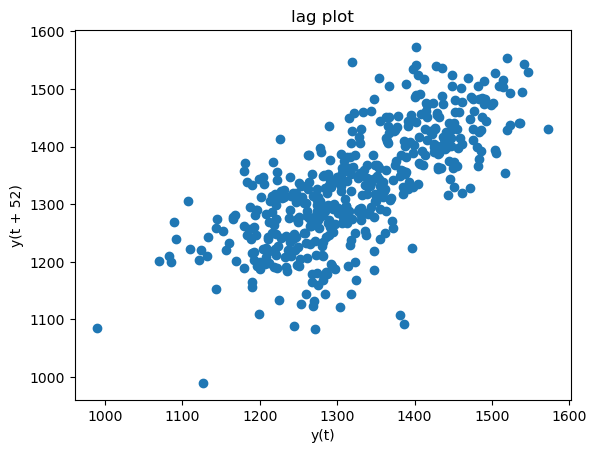

In [30]:
pd.plotting.lag_plot(train.Consumption.resample('W').mean(), lag=52)
plt.title('lag plot');

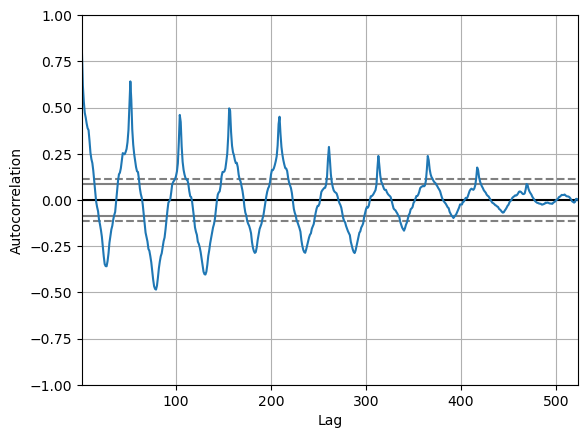

In [31]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())
plt.show()

In [32]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

In [33]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

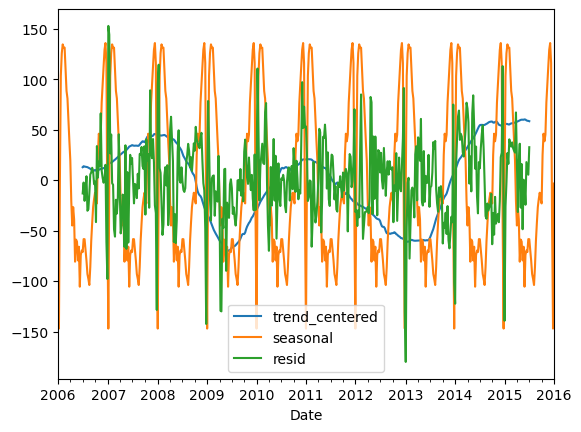

In [34]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [35]:
train = train.drop(columns=['y(t + 1)','weekday','day_num'])
train = train.resample('D').mean()
train

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/3322013610.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train = train.resample('D').mean()


,Consumption,Wind,Solar,Wind+Solar,year
Date,,,,,
2006-01-01,1069.184,164.814173,89.258695,0.000,2006.0
2006-01-02,1380.521,164.814173,89.258695,0.000,2006.0
2006-01-03,1442.533,164.814173,89.258695,0.000,2006.0
2006-01-04,1457.217,164.814173,89.258695,0.000,2006.0
2006-01-05,1477.131,164.814173,89.258695,0.000,2006.0
...,...,...,...,...,...
2015-12-27,1068.214,440.394000,38.625000,479.019,2015.0
2015-12-28,1219.075,206.191000,41.696000,247.887,2015.0
2015-12-29,1233.660,305.635000,32.625000,338.260,2015.0


In [36]:
train['Consumption_bin'] = pd.qcut(train.Consumption, 3, labels=['low', 'med', 'high'])

In [37]:
train.groupby('Consumption_bin').resample('M').size()

Date,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,...,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31
Consumption_bin,,,,,,,,,,,,,,,,,,,,,
low,5,4,5,12,11,11,10,12,9,10,...,6,10,14,9,8,10,8,9,6,12
med,6,4,4,12,20,19,21,19,20,6,...,3,3,9,14,11,20,4,2,3,5
high,20,20,22,6,0,0,0,0,1,15,...,22,17,8,7,12,1,18,20,21,14


In [38]:
train.groupby('Consumption_bin').mean()

,Consumption,Wind,Solar,Wind+Solar,year
Consumption_bin,,,,,
low,1133.376498,148.559369,90.289683,97.971566,2010.536946
med,1355.630094,137.277502,93.454183,90.120537,2010.267872
high,1500.820103,159.977812,79.760738,96.292535,2010.694330


In [39]:
# plt.figure(figsize=(18, 1000))
# ax = (train.groupby('Consumption')
#  .resample('M')
#  .size()
#  .unstack(0)
#  .apply(lambda row: row / row.sum(), axis=1)
#  .plot.area(title='Consumption_bin over time', ylabel='% of the month'))
# ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
# ax.yaxis.set_major_formatter('{:.0%}'.format)


In [40]:
df = wrangle.read_storedata_from_csv()

In [41]:
df = wrangle.prep_sales(df)

In [42]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Wednesday,9.24
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Thursday,11.76
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Friday,10.92
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Saturday,8.40


In [43]:
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n) 

In [44]:
train = df.iloc[:test_start_index] 
test = df.iloc[test_start_index:] 

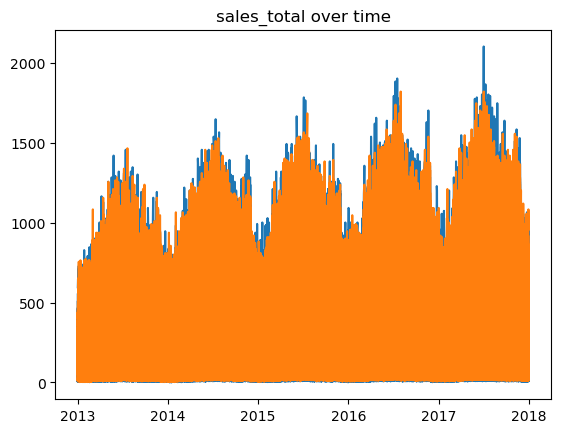

In [45]:
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.title('sales_total over time')
plt.show()

In [46]:
train = df.loc[:'2016'].copy()
test = df.loc['2017':].copy()

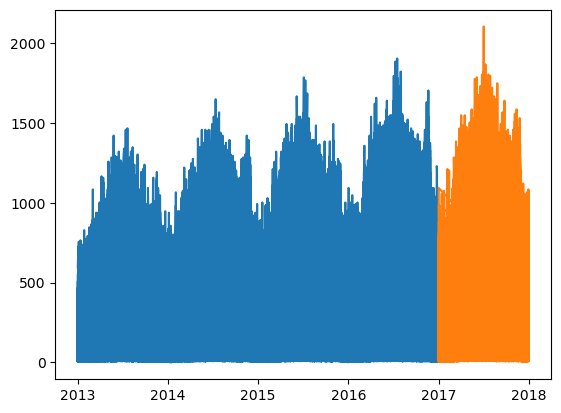

In [47]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

In [48]:
y = train.sales_total
y.head()

sale_date
2013-01-01    10.92
2013-01-02     9.24
2013-01-03    11.76
2013-01-04    10.92
2013-01-05     8.40
Name: sales_total, dtype: float64

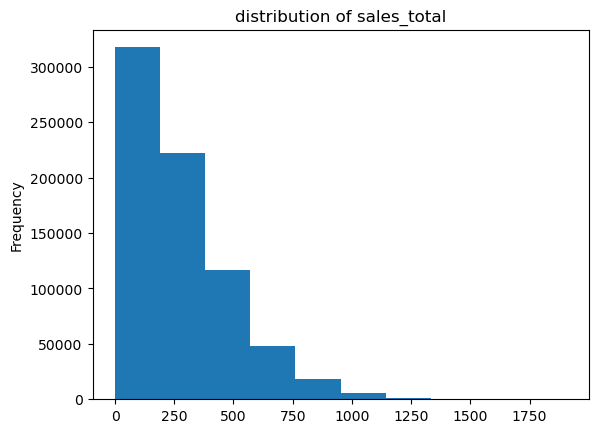

In [49]:
train.sales_total.plot.hist()
plt.title('distribution of sales_total')
plt.show()

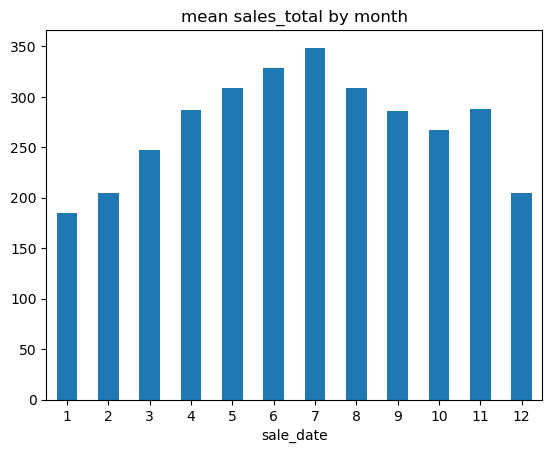

In [50]:
train.groupby(train.index.month).sales_total.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean sales_total by month')
plt.show()

In [51]:
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/790279168.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('weekday').mean().sort_values('day_num').sales_total.plot.bar()


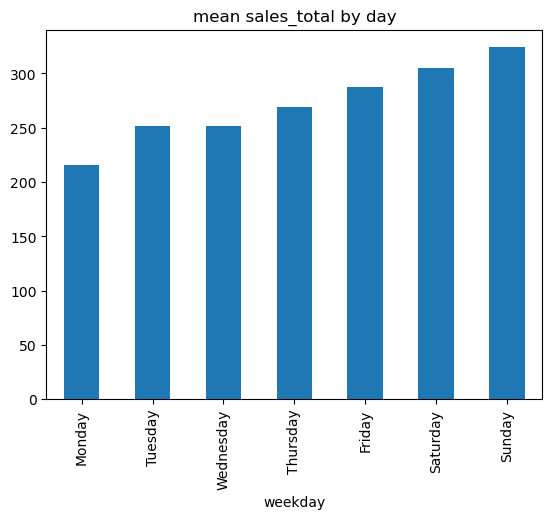

In [52]:
train.groupby('weekday').mean().sort_values('day_num').sales_total.plot.bar()
  
plt.title('mean sales_total by day')
plt.show()

<Axes: xlabel='sale_date'>

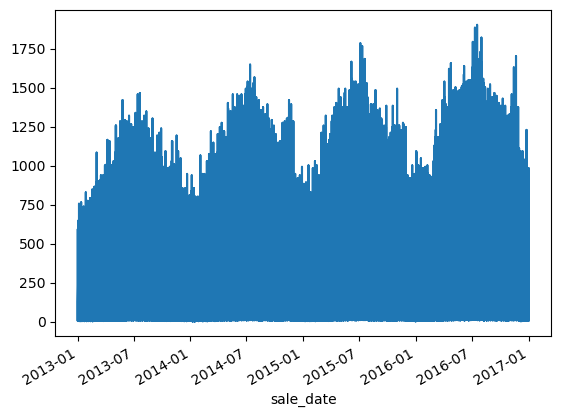

In [53]:
y.plot()

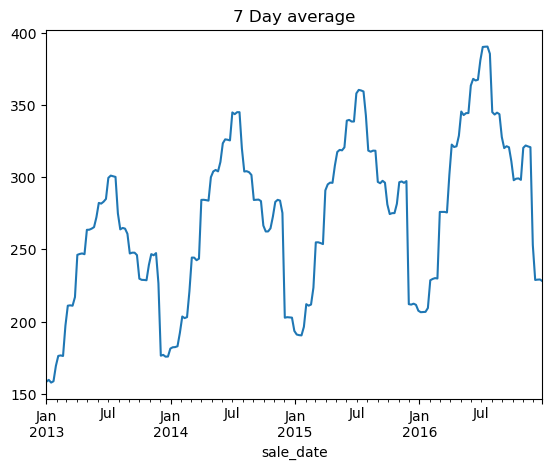

In [54]:
y.resample('7D').mean().plot(title='7 Day average');

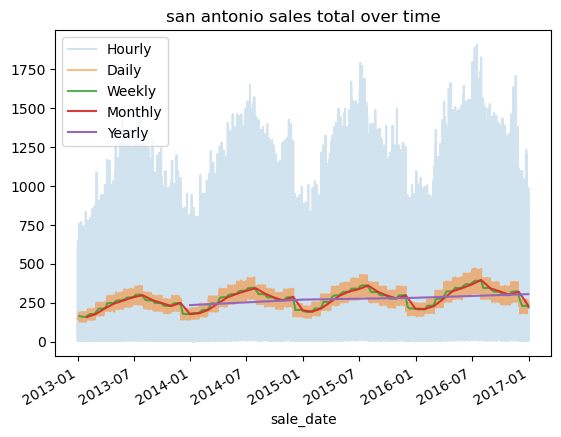

In [55]:
y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('san antonio sales total over time')
plt.legend()
plt.show()

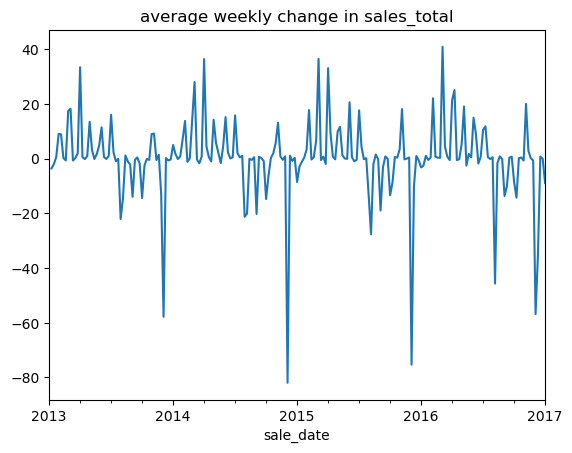

In [56]:
y.resample('W').mean().diff().plot(title='average weekly change in sales_total');

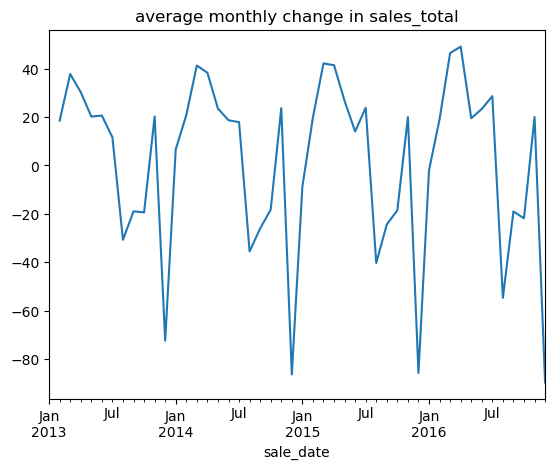

In [57]:
y.resample('M').mean().diff().plot(title='average monthly change in sales_total');

In [58]:
y.groupby([y.index.year, y.index.month]).mean()

sale_date  sale_date
2013       1            157.894723
           2            176.411855
           3            214.181650
           4            244.460082
           5            264.663123
           6            285.261279
           7            296.881241
           8            266.183375
           9            247.237694
           10           227.868064
           11           248.108656
           12           175.753692
2014       1            182.410791
           2            203.207122
           3            244.488991
           4            282.786091
           5            306.267538
           6            324.965376
           7            342.849100
           8            307.345466
           9            281.350430
           10           263.133772
           11           286.821036
           12           200.538977
2015       1            191.725206
           2            211.589839
           3            253.739390
           4            295.147608

In [59]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,394.953287,340.315372,321.333920,299.518321,319.532559,229.882967


In [60]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,394.953287
8,266.183375,307.345466,319.435676,340.315372
9,247.237694,281.350430,295.088416,321.333920


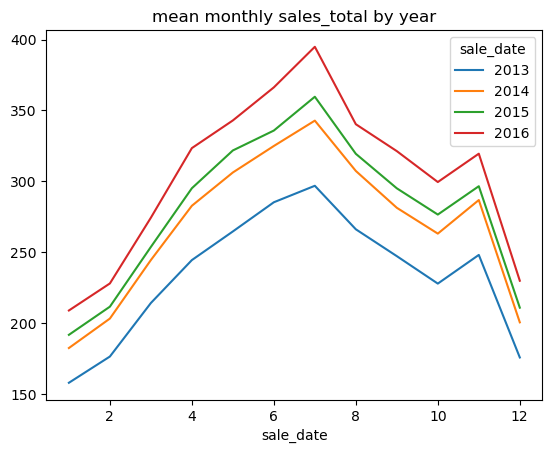

In [61]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly sales_total by year')
plt.show()

In [62]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,394.953287,340.315372,321.333920,299.518321,319.532559,229.882967


/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/1014853132.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


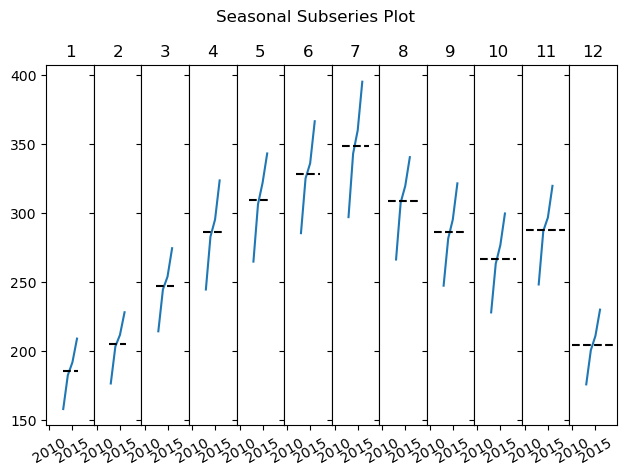

In [63]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [64]:
train['y(t + 1)'] = train.sales_total.shift(-1)
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,weekday,sales_total,day_num,y(t + 1)
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92,1,9.24
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Wednesday,9.24,2,11.76
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Thursday,11.76,3,10.92
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Friday,10.92,4,8.40
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Saturday,8.40,5,10.08


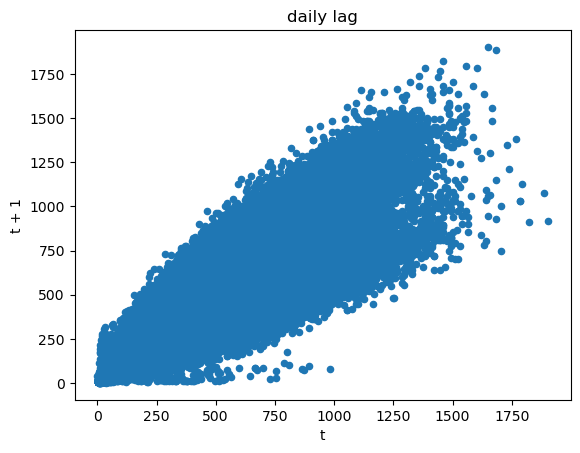

In [65]:
train.plot.scatter(x='sales_total', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('daily lag')
plt.show()

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/1211630089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean().drop(columns='y(t + 1)')


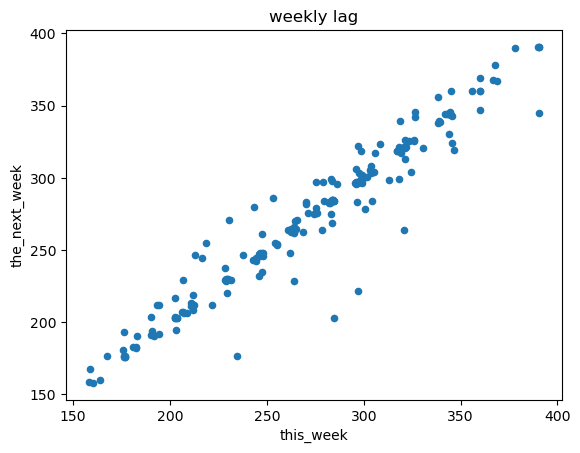

In [66]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/2669023605.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly  = train.resample('W').mean().drop(columns='y(t + 1)')


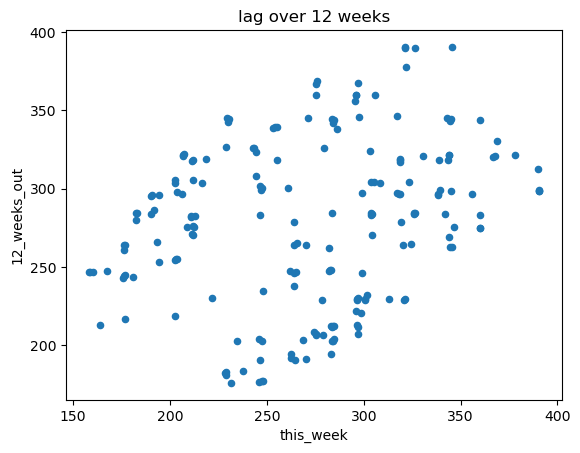

In [67]:
weekly  = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
plt.title('lag over 12 weeks')
plt.show()

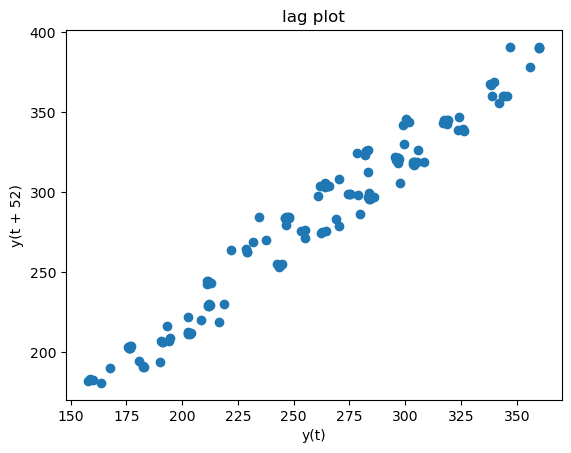

In [68]:
#same thing, but easier
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)
plt.title('lag plot');

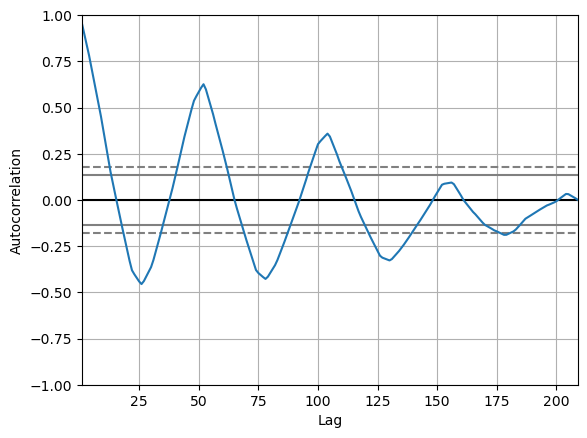

In [69]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()

In [70]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

In [71]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

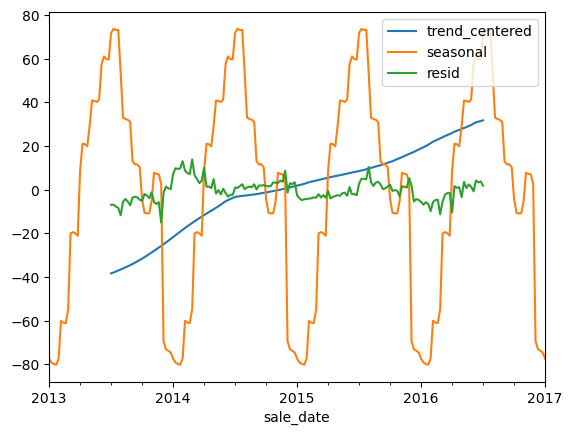

In [72]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [73]:
train = train.drop(columns=['y(t + 1)','weekday','day_num'])
train = train.resample('D').mean()
train

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_5139/3322013610.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train = train.resample('D').mean()


,store_id,item_id,item_upc14,item_upc12,item_price,sale_id,sale_amount,store_zipcode,month,sales_total
sale_date,,,,,,,,,,
2013-01-01,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455588.0,27.392,78224.8,1.0,147.68802
2013-01-02,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455589.0,27.356,78224.8,1.0,147.14116
2013-01-03,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455590.0,28.976,78224.8,1.0,156.33896
2013-01-04,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455591.0,31.354,78224.8,1.0,168.93546
2013-01-05,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455592.0,32.474,78224.8,1.0,175.24370
...,...,...,...,...,...,...,...,...,...,...
2016-12-27,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,457044.0,38.682,78224.8,12.0,207.31578
2016-12-28,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,457045.0,39.120,78224.8,12.0,210.62788
2016-12-29,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,457046.0,42.222,78224.8,12.0,226.44370


In [74]:
train['sales_total'] = pd.qcut(train.sales_total, 3, labels=['low', 'med', 'high'])

In [75]:
train.groupby('sales_total').resample('M').size()

sales_total  sale_date 
low          2013-01-31    31
             2013-02-28    28
             2013-03-31    25
             2013-04-30    14
             2013-05-31     4
                           ..
high         2016-07-31    31
             2016-08-31    26
             2016-09-30    19
             2016-10-31    14
             2016-11-30    19
Length: 137, dtype: int64

In [76]:
train.groupby('sales_total').mean()

,store_id,item_id,item_upc14,item_upc12,item_price,sale_id,sale_amount,store_zipcode,month
sales_total,,,,,,,,,
low,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456149.158111,37.156653,78224.8,5.478439
med,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456291.819302,50.235359,78224.8,7.067762
high,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456513.022587,64.438674,78224.8,7.022587


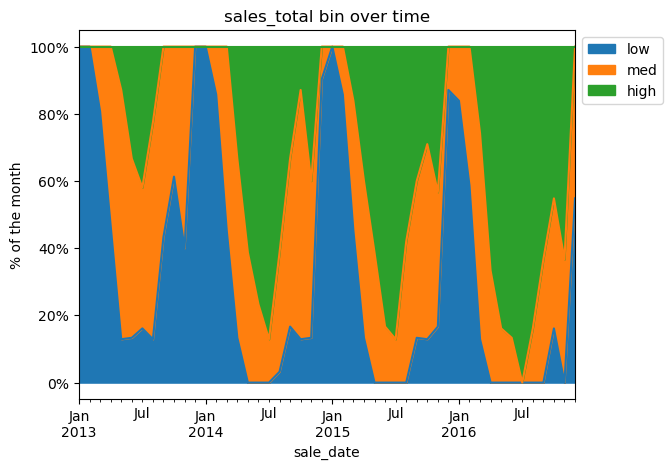

In [77]:
ax = (train.groupby('sales_total')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='sales_total bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)